# Sentiment Analysis on Twitter Data

## Context :

##### This is the sentiment 140 dataset. It contains 1,600,000 tweets extracted using the twitter api . 
##### The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .


##### It contains the following 6 fields :

##### 1. target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

##### 2. ids: The id of the tweet.

##### 3. date: the date of the tweet.

##### 4. flag: The query. If there is no query, then this value is NO_QUERY.

##### 5. user: the user that tweeted.

##### 6. text: the text of the tweet.

## Importing LIbraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import string

## methods and stopwords text processing
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

## Machine learning libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

## English Stopwords

In [2]:
## creating a stopwords set

import nltk
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shivank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading Dataset

In [3]:
Data = pd.read_csv("Sentiment Analysis of 1.6 Million Tweets.csv", encoding = 'latin-1', header = None)

Data.columns = ['Sentiment', 'id', 'Date', 'Query', 'User', 'Tweet']

In [4]:
Data.shape

(1600000, 6)

In [5]:
Data.head()

,Sentiment,id,Date,Query,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
Data.isnull().sum()

Sentiment    0
id           0
Date         0
Query        0
User         0
Tweet        0
dtype: int64

In [7]:
Data.describe()

,Sentiment,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


## Sentiment

* Let's see how the dataset is distributed between the positive and negative sentiment values. I'll plot a bar chart with negative tweets and positive tweets.

Text(0.5, 1.0, 'Count of tweets for each sentiment')

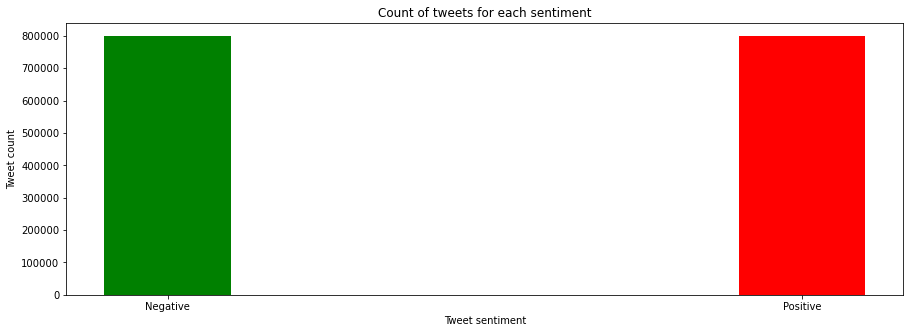

In [8]:
class_count = Data['Sentiment'].value_counts() 
plt.figure(figsize = (15,5))
plt.xticks([4, 0], ['Positive', 'Negative'])
plt.xticks([4, 0])
plt.bar(x = class_count.keys(), height = class_count.values, color = ['g', 'r'])
plt.xlabel("Tweet sentiment")
plt.ylabel("Tweet count")
plt.title("Count of tweets for each sentiment")

* The dataset is evenly distributed between positive (4) and negative (0) tweets.

## Date

* Date is an important feature if I wish to take a look at the tweets based on dates. I'll extract the month from each tweet and then plot the count of tweets for each month.

In [9]:
Data['Month'] = Data['Date'].apply(lambda date: date.split(' ')[1])
months_count  = Data['Month'].value_counts()

Text(0.5, 1.0, 'Tweets during months of 2009')

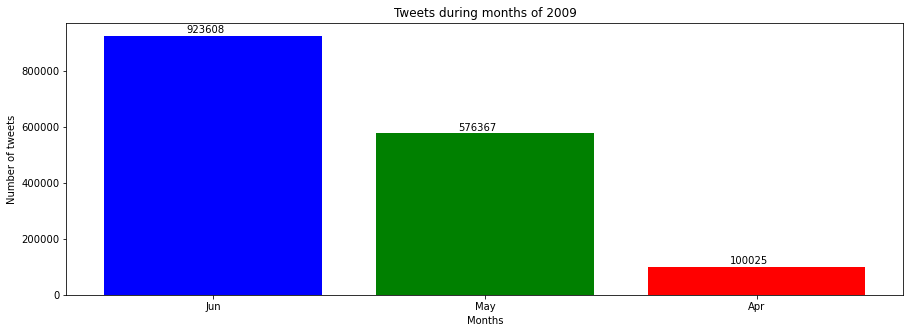

In [10]:
plt.figure(figsize = (15,5))
plt.bar(['Jun', 'May', 'Apr'], months_count.values, color = ['b', 'g', 'r'])
for i, v in enumerate(months_count.values):
    plt.text(i - 0.1, v + 10000, str(v))
plt.xlabel('Months')
plt.ylabel('Number of tweets')
plt.title('Tweets during months of 2009')

* As we can see, the maximum tweets were grabbed in the June 2009.

### Dropping the columns

In [11]:
Data = Data.drop(columns = ['id', 'Date', 'Month', 'Query', 'User'], axis = 1)

In [12]:
Data.head()

,Sentiment,Tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [13]:
Data.shape

(1600000, 2)

In [14]:
Data['Sentiment'].value_counts()

0    800000
4    800000
Name: Sentiment, dtype: int64

In [15]:
positive_tweets = ' '.join(Data[Data['Sentiment'] == 4]['Tweet'].str.lower())
negative_tweets = ' '.join(Data[Data['Sentiment'] == 0]['Tweet'].str.lower())

Text(0.5, 1.0, 'Positive tweets Wordcloud')

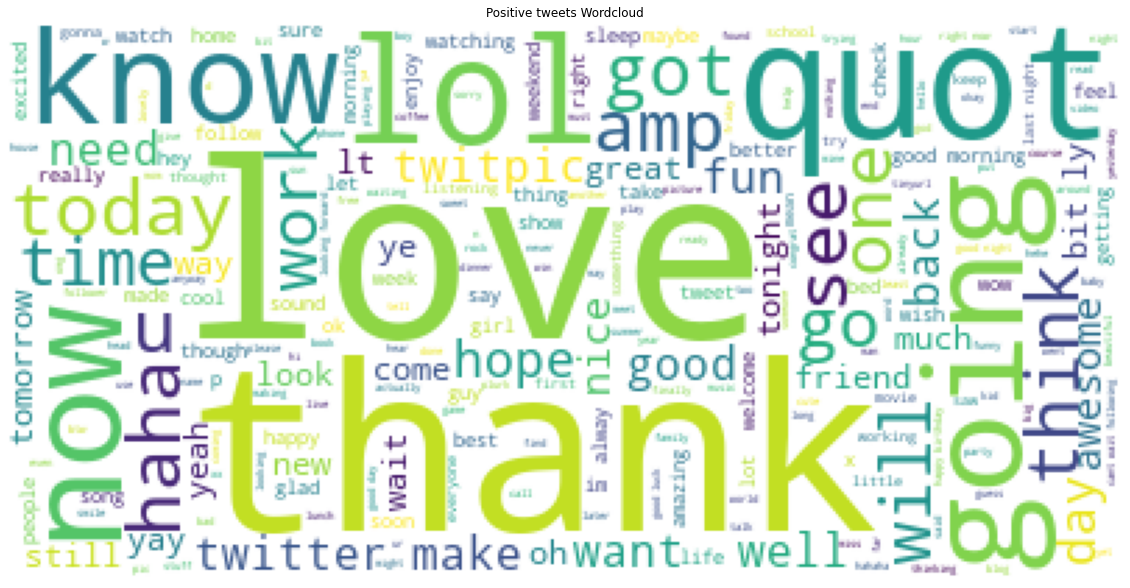

In [16]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(positive_tweets)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive tweets Wordcloud")

Text(0.5, 1.0, 'Negative tweets Wordcloud')

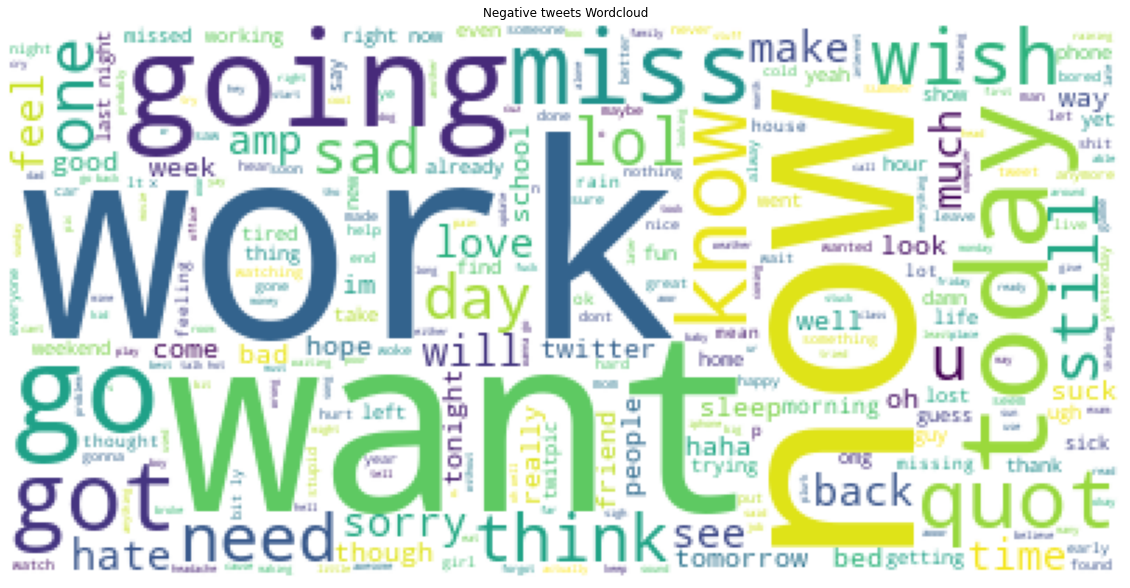

In [17]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(negative_tweets)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative tweets Wordcloud")

* From the word clouds above, it appears that the top words for each tweet sentiment are very similar such as ***lol**, and ***quot***. We will need to create a neural network that can classify the sentiments even with such high similarity of words.

In [23]:
Data.isnull().sum()

Sentiment    0
Tweet        0
dtype: int64

In [24]:
Data.rename(columns = {'Tweet':'text'}, inplace = True)
Data.head()

,Sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


## PreProcessing of Text

### Text Normalization

Text Preprocessing is traditionally an important step for Natural Language Processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

The Preprocessing steps taken are:

  **1. Lower Casing:** Each text is converted to lowercase. Replacing URLs: Links starting with "http" or "https" or "www" are replaced by "URL".

  **2. Replacing Emojis:** Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile")

  **3. Replacing Usernames:** Replace @Usernames with word "USER". (eg: "@Kaggle" to "USER")

  **4. Removing Non-Alphabets:** Replacing characters except Digits and Alphabets with a space.

  **5. Removing Consecutive letters:** 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")

  **6. Removing Short Words:** Words with length less than 2 are removed.

  **7. Removing Stopwords:** Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")

  **8. Lemmatizing:** Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)

In [25]:
# dictionary containing all emojis.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused',
          '$_$': 'greedy','@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused','<(-_-)>': 'robot', 'd[-_-]b': 'dj', 
          ":'-)": 'sadsmile',';)': 'wink',';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

# list containing all stopwords.
stopword =  ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an','and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do','does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here','hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma','me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them','themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was', 'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre","youve", 'your', 'yours', 'yourself', 'yourselves']

In [26]:
# Function to clean the data.
def preprocess(text , wordLemm):
    processedText = []
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in text:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        
        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [27]:
wordLemm = WordNetLemmatizer()
X = preprocess(list(Data['text']), wordLemm)
y = Data['Sentiment']

In [30]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1599995    4
1599996    4
1599997    4
1599998    4
1599999    4
Name: Sentiment, Length: 1600000, dtype: int64

## Splitting the data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
pd.DataFrame(X_train , y_train).info

<bound method DataFrame.info of                                                            0
Sentiment                                                   
4          USER with ya quot like palm pre touchstone cha...
4          felt the earthquake this afternoon it seems to...
4                   ruffle on shirt are like so in me likey 
0          pretty bad night into crappy morning fml if on...
4                                 USER yeah what clear view 
...                                                      ...
0          this song middle change just doesn want to be ...
4                                  USER good luck with that 
0                                 USER rather average 32370 
0          pickin up USER waitin on USER hurry up odee mi...
0          home studying for math woot im so going to fai...

[1280000 rows x 1 columns]>

### TF-IDF usage

* Countvectorizer gives equal weightage to all the words, i.e. a word is converted to a column.
* TF-IDF is different from countvectorizer.
* vocabulary_ just gives a dict of indexes of the words.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(ngram_range = (1,2), max_features = 1000000, stop_words = stopword)

vect.fit(X_train)

TfidfVectorizer(max_features=1000000, ngram_range=(1, 2),
                stop_words=['a', 'about', 'above', 'after', 'again', 'ain',
                            'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at',
                            'be', 'because', 'been', 'before', 'being', 'below',
                            'between', 'both', 'by', 'can', 'd', 'did', 'do',
                            'does', 'doing', 'down', ...])

In [34]:
X_train = vect.transform(X_train)
X_test  = vect.transform(X_test)

### Modelling

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

### Naive Bayes Classifier

In [36]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train,y_train)

nb_pred = nb_clf.predict(X_test)
print('Naive Bayes Accuracy :',accuracy_score(y_test,nb_pred))

Naive Bayes Accuracy : 0.795753125


### Logistic Regression Classifier

In [37]:
log_clf = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
log_clf.fit(X_train,y_train)

log_pred = log_clf.predict(X_test)
print('Logistic Regression Accuracy :',accuracy_score(y_test,log_pred))

Logistic Regression Accuracy : 0.81224375


[[127873  31621]
 [ 28461 132045]]


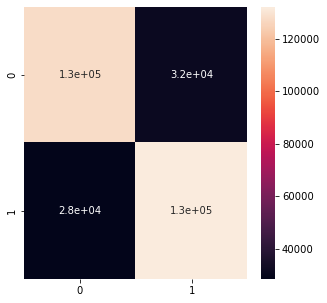

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,log_pred)
print(cm)

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.show()

In [44]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81    159494
           4       0.81      0.82      0.81    160506

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000

